<hr>
<p style="text-align:left;">
    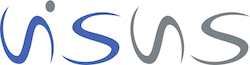
    <span style="float:right;">
        University of Stuttgart<br />Visualization Research Center
    </span>
</p>
<hr>
<p style="text-align:left;">
    <span style="float:left;">
        Prof. Daniel Weiskopf
    </span>
    <span style="float:right;">
        Sunday, 2024-10-27
    </span>
</p>
<br/>

# Theoretical and Methodological Foundations of Visual Computing
## Assignment 02
Responsible tutor: Daniel Klötzl
<br/>

> *Please submit your solution to ILIAS by <b>Sunday, 2024-11-03, 23:55</b>. <br /> Solutions will be discussed in the tutorial on <b>Thursday, 2024-11-07</b>.* <br /> *Please note that source code will only be accepted if it compiles.*
<hr>

**Student name(s):** <font color='green'>Guangxin Zhao</font> <br />
**Immatriculation number(s):** <font color='green'>st194136</font> <br />

<hr>

### Exercise 2.1 (10 points)

Given two points $p,o \in \mathbb{P}^3(\mathbb{R})$ with $p=(p_x:p_y:p_z:1)$ and $o=(-x_0:0:0:1)$, $x_0>0$ as illustrated in the following figure.

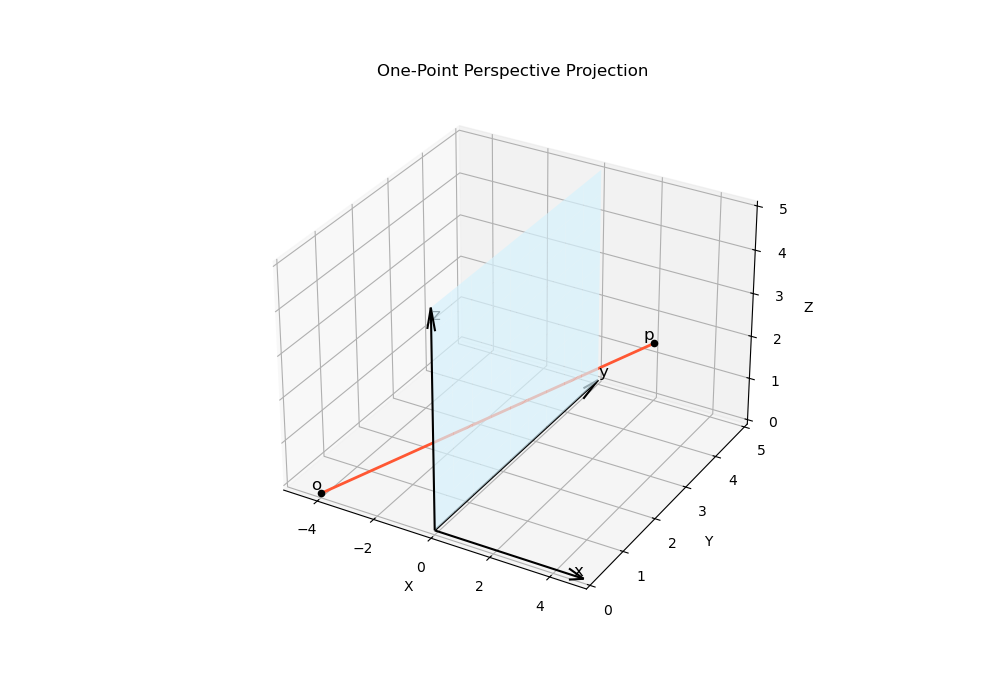

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

# Own colors
color_cyan = '#D6F2FD'
color_red = '#FF5733'

# Create a new figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Set limits for axes
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])

# Create grid for the plane x=0
y = np.linspace(0, 5, 10)
z = np.linspace(0, 5, 10)
Y, Z = np.meshgrid(y, z)
X = np.zeros_like(Y)

# Plot the plane x=0
ax.plot_surface(X, Y, Z, facecolor='#D6F2FD', edgecolor='none', alpha=0.7)


# Plot the axes
ax.quiver(0, 0, 0, 5, 0, 0, color='black', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, 0, 5, 0, color='black', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, 0, 0, 5, color='black', arrow_length_ratio=0.1)

# Add labels to axes
ax.text(5, 0, 0, 'x', color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
ax.text(0, 5, 0, 'y', color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='left')
ax.text(0, 0, 5, 'z', color='black', fontsize=12, verticalalignment='top', horizontalalignment='left')

# Define the points "o" and "p"
o = np.array([-4, 0, 0])
p = np.array([4, 3, 3])

# Plot the line from "o" to "p"
ax.plot([o[0], p[0]], [o[1], p[1]], [o[2], p[2]], color=color_red, linestyle='-', linewidth=2)

# Add markers and labels for points "o" and "p"
ax.scatter(o[0], o[1], o[2], color='black')
ax.text(o[0], o[1], o[2], 'o', color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='right')

ax.scatter(p[0], p[1], p[2], color='black')
ax.text(p[0], p[1], p[2], 'p', color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='right')

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set title
ax.set_title('One-Point Perspective Projection')

# Show plot
plt.show()

`(a)` Construct the *one-point perspective projection* in $\mathbb{P}^3(\mathbb{R})$ for the observer at $o$ and the projection point $p$. 

In this problem, we have:
- Obeserver at $o=(-x_0:0:0:1)$
- Projection plane is the $yz$-plane (For simplicity)
- Projection point $p=(p_x:p_y:p_z:1)$ onto $yz$-plane
- Field of vision is the domain $x>-x_0$

According to the intercept theorem, we have then the projective point $p'=(0:\frac{x_0P_y}{x_0+P_x}:\frac{x_0P_z}{x_0+P_x}:1)$.

`(b)` Split the perspective projection into the respective perspective transformation and the projection part.

We can also rewrite $p'$, so that $p'=(0:x_0P_y:x_0P_z:x_0+P_x)$.

Then, the perspective projection can be expressed by:

\begin{equation*}
    \begin{pmatrix}
        0 & 0   & 0   & 0 \\
        0 & x_0 & 0   & 0 \\
        0 & 0   & x_0 & 0 \\
        1 & 0   & 0   & x_0
    \end{pmatrix}
    \begin{pmatrix}
        P_x \\
        P_y \\
        P_z \\
        1    
    \end{pmatrix}=
    \begin{pmatrix}
        0      \\
        x_0P_y \\
        x_0P_z \\
        x_0+P_x
    \end{pmatrix}.
\end{equation*}

Or equally:

\begin{equation*}
    \begin{pmatrix}
        0             & 0 & 0 & 0 \\
        0             & 1 & 0 & 0 \\
        0             & 0 & 1 & 0 \\
        \frac{1}{x_0} & 0 & 0 & 1
    \end{pmatrix}
    \begin{pmatrix}
        P_x \\
        P_y \\
        P_z \\
        1    
    \end{pmatrix}=
    \begin{pmatrix}
        0   \\
        P_y \\
        P_z \\
        \frac{P_x}{x_0}+1
    \end{pmatrix}.
\end{equation*}

Split the matrix, we have then:

\begin{equation*}
    \begin{pmatrix}
        0             & 0 & 0 & 0 \\
        0             & 1 & 0 & 0 \\
        0             & 0 & 1 & 0 \\
        \frac{1}{x_0} & 0 & 0 & 1
    \end{pmatrix}=
    \begin{pmatrix}
        0 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        0 & 0 & 0 & 1
    \end{pmatrix}
    \begin{pmatrix}
        1             & 0 & 0 & 0 \\
        0             & 1 & 0 & 0 \\
        0             & 0 & 1 & 0 \\
        \frac{1}{x_0} & 0 & 0 & 1
    \end{pmatrix}=P_x\cdot T
\end{equation*}

, in which

\begin{equation*}
    P_x=
    \begin{pmatrix}
        0 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        0 & 0 & 0 & 1
    \end{pmatrix}\text{ and } T=
    \begin{pmatrix}
        1             & 0 & 0 & 0 \\
        0             & 1 & 0 & 0 \\
        0             & 0 & 1 & 0 \\
        \frac{1}{x_0} & 0 & 0 & 1
    \end{pmatrix}.
\end{equation*}

Thus, we can split the perspective projection into the respective perspective transformation $T$ and the projection part $P_x$.

`(c)` Compute the one-point perspective projection $\tilde{p}$ of $p=(1:2:3:1)$ for $o=(-4:0:0:1)$.

$p'=(0:x_0P_y:x_0P_z:x_0+P_x)$.

Take $P_x=1,P_y=2,P_z=3,$ and $x_0=4$ into $p'$, we have:

$$
p'=(0:8:12:5).
$$


`(d)` Write a Jupyter Notebook script that draws a tetrahedron $\mathcal{T}$, spanned by the vertices $p_1 = (1, 1, 1)'$, $p_2 = (1, 3, 1)'$, $p_3=(1,2,3)'$, and $p_4=(3,2,2)'$. Visualize the one-point perspective projection $\tilde{\mathcal{T}}$ of this tetrahedron from the observer $o=(-4,0,0)'$. Draw the perspective plane, the observer, the 3-dimensional tetrahedron, and the projected tetrahedron in one 3-dimensional view.


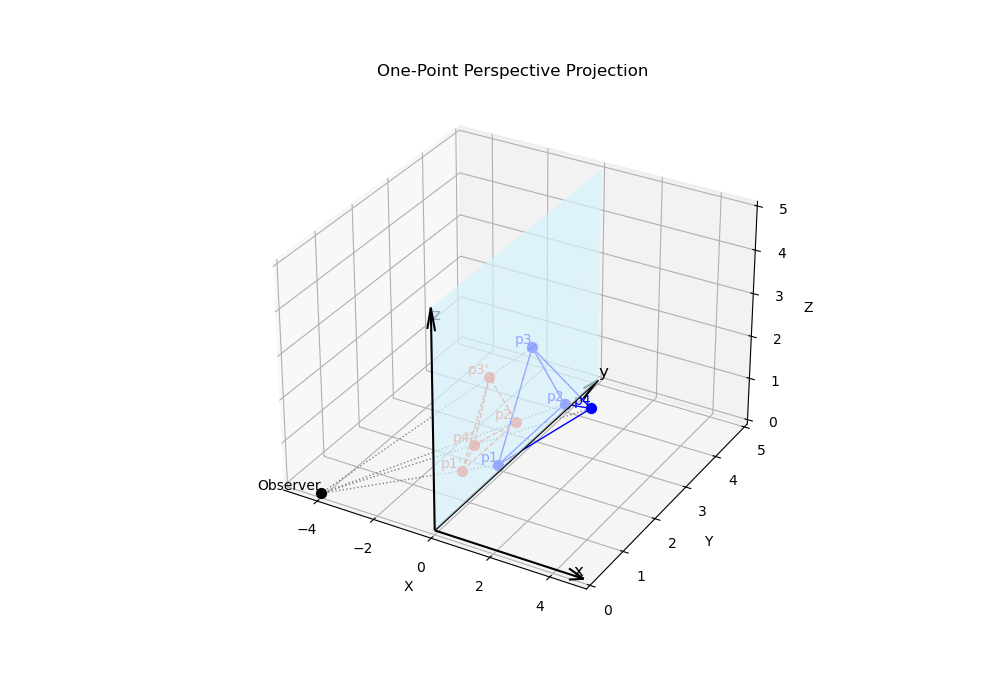

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

# Own colors
color_cyan = '#D6F2FD'
color_red = '#FF5733'

# Define vertices of the tetrahedron
p = np.array([[1, 1, 1],
              [1, 3, 1],
              [1, 2, 3],
              [3, 2, 2]])

# Observer's position
o = np.array([-4, 0, 0])

# Create a new figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Set limits for axes
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])

# Create grid for the plane x=0
y = np.linspace(0, 5, 10)
z = np.linspace(0, 5, 10)
Y, Z = np.meshgrid(y, z)
X = np.zeros_like(Y)

# Plot the plane x=0
ax.plot_surface(X, Y, Z, facecolor='#D6F2FD', edgecolor='none', alpha=0.7)

# Plot the axes
ax.quiver(0, 0, 0, 5, 0, 0, color='black', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, 0, 5, 0, color='black', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, 0, 0, 5, color='black', arrow_length_ratio=0.1)

# Add labels to axes
ax.text(5, 0, 0, 'x', color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
ax.text(0, 5, 0, 'y', color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='left')
ax.text(0, 0, 5, 'z', color='black', fontsize=12, verticalalignment='top', horizontalalignment='left')

def projection(p, o):
    x0 = abs(o[0])
    return [0, x0 * p[1] / (x0 + p[0]), x0 * p[2] / (x0 + p[0])]

p_proj = np.array([projection(pi, o) for pi in p])

# Plot the observer position
ax.scatter(*o, color='black', s=50)
ax.text(*o, 'Observer', color='black', fontsize=10, verticalalignment='bottom', horizontalalignment='right')

# Plot the original tetrahedron edges
edges = [(p[0], p[1]), (p[0], p[2]), (p[0], p[3]), (p[1], p[2]), (p[1], p[3]), (p[2], p[3])]
for edge in edges:
    ax.plot(*zip(*edge), color='blue', linewidth=1)

# Plot the projected tetrahedron edges
for edge in edges:
    ax.plot(*zip(*[projection(edge[0], o), projection(edge[1], o)]), color=color_red, linestyle='--', linewidth=1)

# Plot lines from observer to each vertex of the original tetrahedron
for vertex in p:
    ax.plot([o[0], vertex[0]], [o[1], vertex[1]], [o[2], vertex[2]], color='gray', linestyle=':', linewidth=1)

# Draw original and projected vertices with labels
for i, vertex in enumerate(p):
    ax.scatter(*vertex, color='blue', s=50)
    ax.text(*vertex, f'p{i+1}', color='blue', fontsize=10, verticalalignment='bottom', horizontalalignment='right')

for i, vertex_proj in enumerate(p_proj):
    ax.scatter(*vertex_proj, color=color_red, s=50)
    ax.text(*vertex_proj, f'p{i+1}\'', color=color_red, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set title
ax.set_title('One-Point Perspective Projection')

# Show plot
plt.show()

<hr>

### Exercise 2.2 (10 points)

Given 2 points $p,q\in \mathbb{P}^2(\mathbb{R})$, where $p = (0:y_{p}:1)$ and $q=(-x_0:y_q:1)$, the observer point 
$o=(-x_0:0:1)$ with $x_0>1$, and the perspective transformation
\begin{equation*}
	T = \begin{pmatrix}
		1 & 0 & 0 \\ 0 & 1 & 0 \\ \frac{1}{x_0} & 0 & 1 
	\end{pmatrix}.
\end{equation*}
The object line $g = \overline{pq}$ can be represented by the parametrized form
$g=\{(x:mx+y_0:1)\in\mathbb{P}^2(\mathbb{R})\}$, where $m$ is the slope of the line and $y_0$ is the $y$-intercept.

`(a)` Determine the object line parametrization $g$ by calculating the slope $m$ and the value $y_0$. Then apply the perspective transformation $T$ to the line $g$ to calculate $\tilde{g}$ and simplify it to the parametrized form.

Slope $m=\frac{y_p-y_q}{x_0}$, $y_0=y_p$.

We have 

\begin{equation*}
    \tilde{g}=T\cdot g=
	\begin{pmatrix}
		1             & 0 & 0 \\ 
        0             & 1 & 0 \\ 
        \frac{1}{x_0} & 0 & 1 
	\end{pmatrix}
    \begin{pmatrix}
        x \\
        \frac{y_p-y_q}{x_0}x+y_p \\
        1
    \end{pmatrix}=
    \begin{pmatrix}
        x \\
        \frac{y_p-y_q}{x_0}x+y_p \\
        \frac{x}{x_0}+1
    \end{pmatrix}.
\end{equation*}

Converting $\tilde{g}$ to the parametrized form, we have $\tilde{g}=\{(x:mx+y_0:\frac{x}{x_0}+1)\in\mathbb{P}^2(\mathbb{R})\}$.

`(b)` Compute the object lines $g$ and $\tilde{g}$ for $y_p = 2$, $y_q = 4$, and $x_0=4$ and draw them in the figure below.

Take $y_p = 2$, $y_q = 4$, and $x_0=4$ into $g$ and $\tilde{g}$, we have

$$
g=\{(x:-\frac{1}{2}x+2:1)\in\mathbb{P}^2(\mathbb{R})\}
$$

, and

$$
\tilde{g}=\{(x:-\frac{1}{2}x+2:\frac{x}{4}+1)\in\mathbb{P}^2(\mathbb{R})\}.
$$

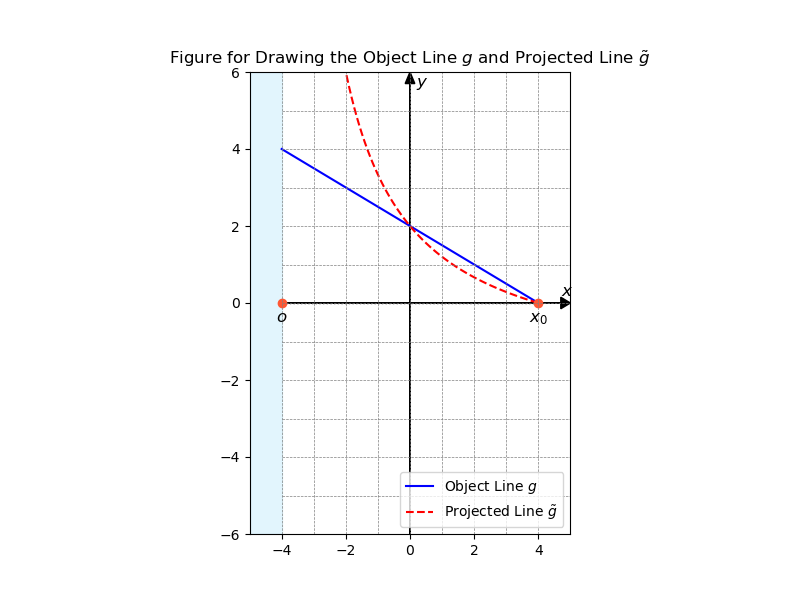

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# Own colors
color_cyan = '#D6F2FD'
color_red = '#FF5733'

# Create a new figure
fig, ax = plt.subplots(figsize=(8, 6))

# Set limits for axes
ax.set_xlim(-5, 5)
ax.set_ylim(-6, 6)

# Define key points
O = np.array([-4, 0])  # Observer
x0 = np.array([4, 0])  # x0 on x-axis
p = np.array([0, 2])   # Point p
q = np.array([-4, 4])  # Point q

# Define boundaries for the projection plane
b1 = O + np.array([0, 6])
b2 = O + np.array([-1, 6])
b4 = O - np.array([0, 6])
b3 = O - np.array([1, 6])

# Define the object line g: y = -1/2 x + 2
x_vals = np.linspace(-4, 4, 100)
y_vals_g = -0.5 * x_vals + 2

# Calculate perspective transformation for line g to get line g~ (no explicit projection on y-axis)
y_vals_g_tilde = -0.5 * x_vals + 2  # y-coordinates of g (unchanged)
w_vals_g_tilde = x_vals / 4 + 1     # w-coordinates after perspective transformation

# Add epsilon to avoid divide-by-zero
epsilon = 1e-10
w_vals_g_tilde = np.where(w_vals_g_tilde == 0, epsilon, w_vals_g_tilde)

# Final y-coordinates after perspective projection (keeping x-coordinates as calculated for transformed line)
y_vals_g_proj = y_vals_g_tilde / w_vals_g_tilde

# Draw the axes
ax.arrow(O[0], O[1], 8.7, 0, head_width=0.3, head_length=0.3, fc='k', ec='k')
ax.arrow(0, -6, 0, 11.7, head_width=0.3, head_length=0.3, fc='k', ec='k')

# Set axis labels
ax.text(4.7, 0.3, '$x$', fontsize=12, va='center')
ax.text(0.2, 5.7, '$y$', fontsize=12, va='center')

# Draw the dotted line for observer direction
ax.plot([O[0], x0[0]], [O[1], x0[1]], 'k:', linewidth=1)

# Draw the projection plane as a polygon
polygon = Polygon([b1, b2, b3, b4], closed=True, color=color_cyan, alpha=0.7)
ax.add_patch(polygon)

# Draw object line g
ax.plot(x_vals, y_vals_g, 'b-', label='Object Line $g$', linewidth=1.5)

# Draw projected line g~ (transformed line)
ax.plot(x_vals, y_vals_g_proj, 'r--', label='Projected Line $\\tilde{g}$', linewidth=1.5)

# Add labels and markers
ax.plot(O[0], O[1], marker='o', color=color_red)
ax.text(O[0], O[1] - 0.5, '$o$', fontsize=12, ha='center')

ax.plot(x0[0], x0[1], marker='o', color=color_red)
ax.text(x0[0], x0[1] - 0.5, '$x_0$', fontsize=12, ha='center')

# Draw grid lines
for i in range(-5, 6):
    ax.plot([i, i], [-6, 6], 'gray', linestyle='--', linewidth=0.5)
for i in range(-6, 6):
    ax.plot([-4, 5], [i, i], 'gray', linestyle='--', linewidth=0.5)

# Set aspect ratio and title
ax.set_aspect(1.2)
ax.set_title('Figure for Drawing the Object Line $g$ and Projected Line $\\tilde{g}$')

# Add legend
ax.legend()

# Show plot
plt.show()

`(c)` Determine the infinite distant point on $g$ in homogeneous coordinates as well as the corresponding vanishing point on $\tilde{g}$ (i.e., after transformation by $T$) for the general case. Also compute the solutions for the variables given in `(b)`.

Recall that $g=\{(x:mx+y_0:1)\in\mathbb{P}^2(\mathbb{R})\}$. If we set the third coordinate in $g$ to $0$, we can find the infinite distant point $g_{\infty}$.

We have

$$
g_{\infty}=(x:mx:0)
$$

, which equals to

$$
g_{\infty}=x(1:m:0)=(1:m:0).
$$

Taking $g_{\infty}$ into perspective projection, we have then

\begin{equation*}
    \tilde{g}_{\infty}=T\cdot g=
	\begin{pmatrix}
		1             & 0 & 0 \\ 
        0             & 1 & 0 \\ 
        \frac{1}{x_0} & 0 & 1 
	\end{pmatrix}
    \begin{pmatrix}
        1 \\
        m \\
        0
    \end{pmatrix}=
    \begin{pmatrix}
        1 \\
        m \\
        \frac{1}{x_0}
    \end{pmatrix}.
\end{equation*}

If we follow the settings in `(b)`, then $g_{\infty}$ and $\tilde{g}_{\infty}$ can be expressed by

\begin{equation*}
    \begin{aligned}
        g_{\infty} &= \left(1 : -\frac{1}{2} : 0\right), \\
        \tilde{g}_{\infty} &= \left(1 : -\frac{1}{2} : \frac{1}{4}\right).
    \end{aligned}
\end{equation*}

<div class="alert alert-success">

### Guidelines for Submission

Do not forget to update the student name(s) and matriculation number(s). 

**Text-based Responses**

For text-based questions, a markdown cell with the placeholder `Cell left blank for student response` will usually follow the question. Ensure that text responses are either entered in markdown cells using plain text and LaTeX or via the import of PDFs or PNG files (e.g. via `![ExampleFileName](example_file.png)` for handwritten solutions). If external files are used in your Jupyter Notebook, make sure to include all data in a zipped folder uploaded to Ilias.

**Code-based Responses**

For questions that involve Python coding, you'll typically find a code cell with the placeholder `# YOUR CODE HERE`.

#### Submission Process

To ensure your notebook runs smoothly from start to finish, select "Restart & Run All" from the "Kernel" menu before submitting.

When ready to submit, upload your `.ipynb` file (or a zipped folder containing the `.ipynb` file as well as all auxiliary files, e.g. imported .pdf or .jpg files) to Ilias.

</div>